# final results with systematical uncetainties

In [1]:
import sys; sys.path.insert(0, '../../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline
%precision 3
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/'

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


# save the differences as systematical uncertainties into a csv

## GENIE models cross-sections

In [2]:
Xsec_dicts_genie = dict()
with open(Paths['1d Xsec'] + "Pmu_genie_Xsecs_1D.txt", 'rb') as infile:
    Xsec_dicts_genie['mu'] = pickle.load(infile)
with open(Paths['1d Xsec'] + "Pp_genie_Xsecs_1D.txt", 'rb') as infile:
    Xsec_dicts_genie['p'] = pickle.load(infile)

## cross-section + statistical uncertainties

In [3]:
Xsec_results_dicts = dict()
with open(Paths['1d Xsec'] + "PmuXsecs_1D.txt", 'rb') as infile:
    Xsec_results_dicts['mu'] = pickle.load(infile)
with open(Paths['1d Xsec'] + "PpXsecs_1D.txt", 'rb') as infile:
    Xsec_results_dicts['p'] = pickle.load(infile)

## systematical uncertainties

In [4]:
with open(Paths['systematics'] + "cut_sensitivty_systemaitcal_uncertainty.txt", 'rb') as infile: 
    Xsec_sys_unc_cuts = pickle.load(infile)
with open(Paths['systematics'] + "beam_flux_uncertainty_systemaitcal_uncertainty.txt", 'rb') as infile: 
    Xsec_sys_unc_beam_flux = pickle.load(infile)
POT_unc = 0.02 # 2% (proton flux measured in the two toroids agree to within 2%...)

## now draw the cross-sections

In [5]:
def draw_Xsecs(do_add_afro_genie = True, debug=0, particle='mu',do_with_ctu_bin=False,
               do_P=True, do_cos_theta=True, do_phi=True,figsize=(24,10),
               residuals_ylim=[-1,1],residuals_yticks=[-0.5,0,0.5],residuals_ytitle=1.05,residuals_xtitle='center'):
    
    Xsec_dicts = Xsec_results_dicts[particle]
    Xsec_dicts_genie_particle = Xsec_dicts_genie[particle]

    
    figurename = 'Xsec_1D_P'+particle 
    for iXsec,(Xsec_title,Xsec_fname,remove_ctu_bin) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames,remove_ctu_bools)):#{
        if remove_ctu_bin==False and do_with_ctu_bin==False: continue
            
        Xsec_dict = Xsec_dicts[Xsec_title]
        Xsec_genie_dict = Xsec_dicts_genie_particle[Xsec_title]

        fig=plt.figure(figsize=figsize)
        for i,(observable,true,ivar,do_var) in enumerate(zip(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']                                                        
                                                                 ,['truth_P'+particle,'truth_P'+particle+'_cos_theta','truth_P'+particle+'_phi']
                                                                 ,[(1,4),(2,5),(3,6)]
                                                                 ,[do_P,do_cos_theta,do_phi])):
            if do_var==False: continue
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            h = dict()
            h['Xsec'],h['Xsec err'] = Xsec_dict[observable],Xsec_dict[observable+' err']
            h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+observable], Xsec_dict['mc '+observable+' err']
            if remove_ctu_bin and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
                h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]

            ax = fig.add_subplot(3,3,ivar)
            ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay') 
            if do_add_afro_genie:#{
                for gname,ls,glabel in zip(genie_list,['-','--','-.',':'],genie_labels):#{
                    mystep(x=mid ,x_width=bin_width, 
                           y=Xsec_genie_dict[gname+' '+observable], 
                           y_width=Xsec_genie_dict[gname+' '+observable+' err'],
                           color='black',linestyle=ls,linewidth=3,label=glabel)
                #}
            #}
            
            # ---------------------------------------- # 
            # systematical uncertainties
            Xsec_sys_unc_cuts_up = Xsec_sys_unc_cuts[var + Xsec_fname + ' Xsec sys. err up']
            Xsec_sys_unc_cuts_dw = Xsec_sys_unc_cuts[var + Xsec_fname + ' Xsec sys. err dw']
            Xsec_sys_unc_flux_up = Xsec_sys_unc_beam_flux[var + Xsec_fname + ' Xsec sys. err up']
            Xsec_sys_unc_flux_dw = Xsec_sys_unc_beam_flux[var + Xsec_fname + ' Xsec sys. err dw']
            Xsec_sys_unc_POT_up = POT_unc * h['Xsec']
            Xsec_sys_unc_POT_dw = POT_unc * h['Xsec']
            Xsec_sys_unc_up = np.sqrt( np.square(Xsec_sys_unc_cuts_up) + np.square(Xsec_sys_unc_flux_up) + np.square(Xsec_sys_unc_POT_up) )
            Xsec_sys_unc_dw = np.sqrt( np.square(Xsec_sys_unc_cuts_dw) + np.square(Xsec_sys_unc_flux_dw) + np.square(Xsec_sys_unc_POT_dw) )
            Xsec_tot_unc_up = np.sqrt( np.square(Xsec_sys_unc_up) + np.square(h['Xsec err']) )
            Xsec_tot_unc_dw = np.sqrt( np.square(Xsec_sys_unc_dw) + np.square(h['Xsec err']) )
            if debug:
                print 'Xsec_sys_unc_cuts_up,Xsec_sys_unc_flux_up,Xsec_sys_unc_up:',Xsec_sys_unc_cuts_up,Xsec_sys_unc_flux_up,Xsec_sys_unc_up
                print 'Xsec_sys_unc_up:',Xsec_sys_unc_up
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',label='data') # data
            plt.errorbar(x=mid,xerr=0,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',markersize=0,capsize=5,capthick=2) # + stat. uncertainties
            plt.errorbar(x=mid,xerr=0,y=h['Xsec'],yerr=[Xsec_tot_unc_dw,Xsec_tot_unc_up],color=Colors['beam on'],fmt='o',markersize=0,capsize=10,capthick=3) # + syst. uncertainties

            # ---------------------------------------- # 
            # axes labels
            set_axes(ax,'',y_label=get_Xsec_label(vlabel=vlabel,units=units),fontsize=23
                         ,do_add_grid=True,remove_ticks_x=True,do_add_legend=True if 'Pmu_cos_theta' in var else False
                         ,ylim=(0,1.1*np.max(ax.get_ylim()))
                        )
            plt.title(Xsec_title, y=1.02,fontsize=25)
            if 'Pmu_cos_theta' in var: plt.plot([bins[-2],bins[-2]],ax.get_ylim(),'--',color='black')


                
            # ---------------------------------------- # 
            # residuals plot
            Xsec_tot_unc = np.sqrt( np.square(Xsec_tot_unc_dw) + np.square(Xsec_tot_unc_up) )
            data,data_err = h['Xsec'],Xsec_tot_unc
            MC,MC_err = h['mc Xsec'],h['mc Xsec err']

            den, den_err = data-MC,np.sqrt(np.square(data_err)+np.square(MC_err))
            num, num_err = data,data_err
            ratio = den/num
            ax = fig.add_subplot(3,3,7+i)
            ratio_err = ratio*np.sqrt(np.square(den_err/den) + np.square(num_err/num))
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=ratio,yerr=ratio_err,fmt='o',markersize=0,color='black')
            plt.errorbar(x=mid,xerr=0,y=ratio,yerr=ratio_err,fmt='o',markersize=0,color='black',capsize=10,capthick=3)
            chi2,ndf = chi2_two_data_curves(h1=data,h1err=data_err,h2=MC,h2err=MC_err,bins=bins,debug=debug)
            set_axes(ax,xlabel,y_label=r'(data-MC)/data' if i==0 else '',
                     do_add_grid=True,ylim=residuals_ylim,yticks=residuals_yticks)
            plt.plot([np.min(bins),np.max(bins)],[0,0],'--',color='royalblue')
            plt.title(r'$\chi^2/ndf=%.2f/%d$'%(chi2,ndf), fontsize=20,y=residuals_ytitle,loc=residuals_xtitle)
            if 'Pmu_cos_theta' in var: plt.plot([bins[-2],bins[-2]],ax.get_ylim(),'--',color='black')                    
        #}
        plt.tight_layout(h_pad=0.0)
        plt.subplots_adjust(hspace=0.05)
        save_figure(figures_path + figurename + '_' + Xsec_fname + '.pdf')
    return 

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pmu_without_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pmu_with_last_ctu_bin.pdf


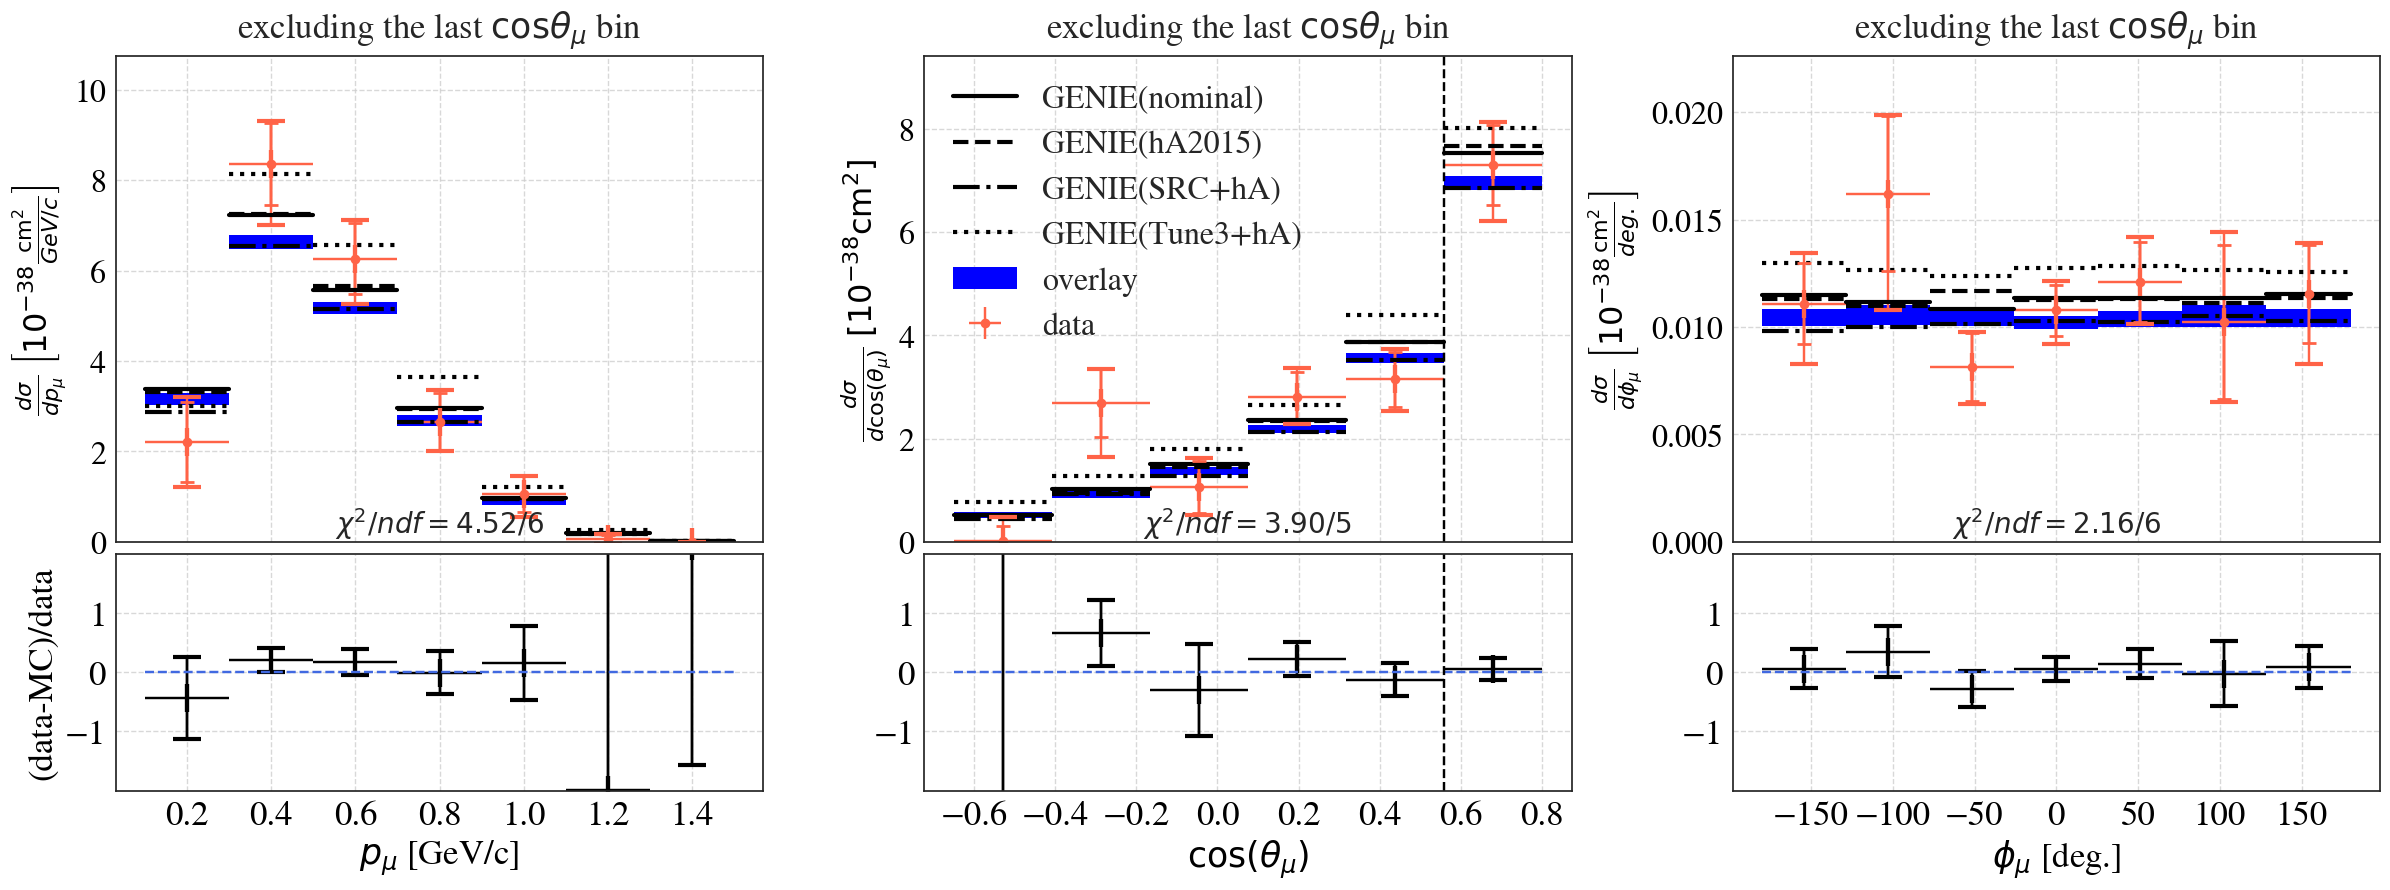

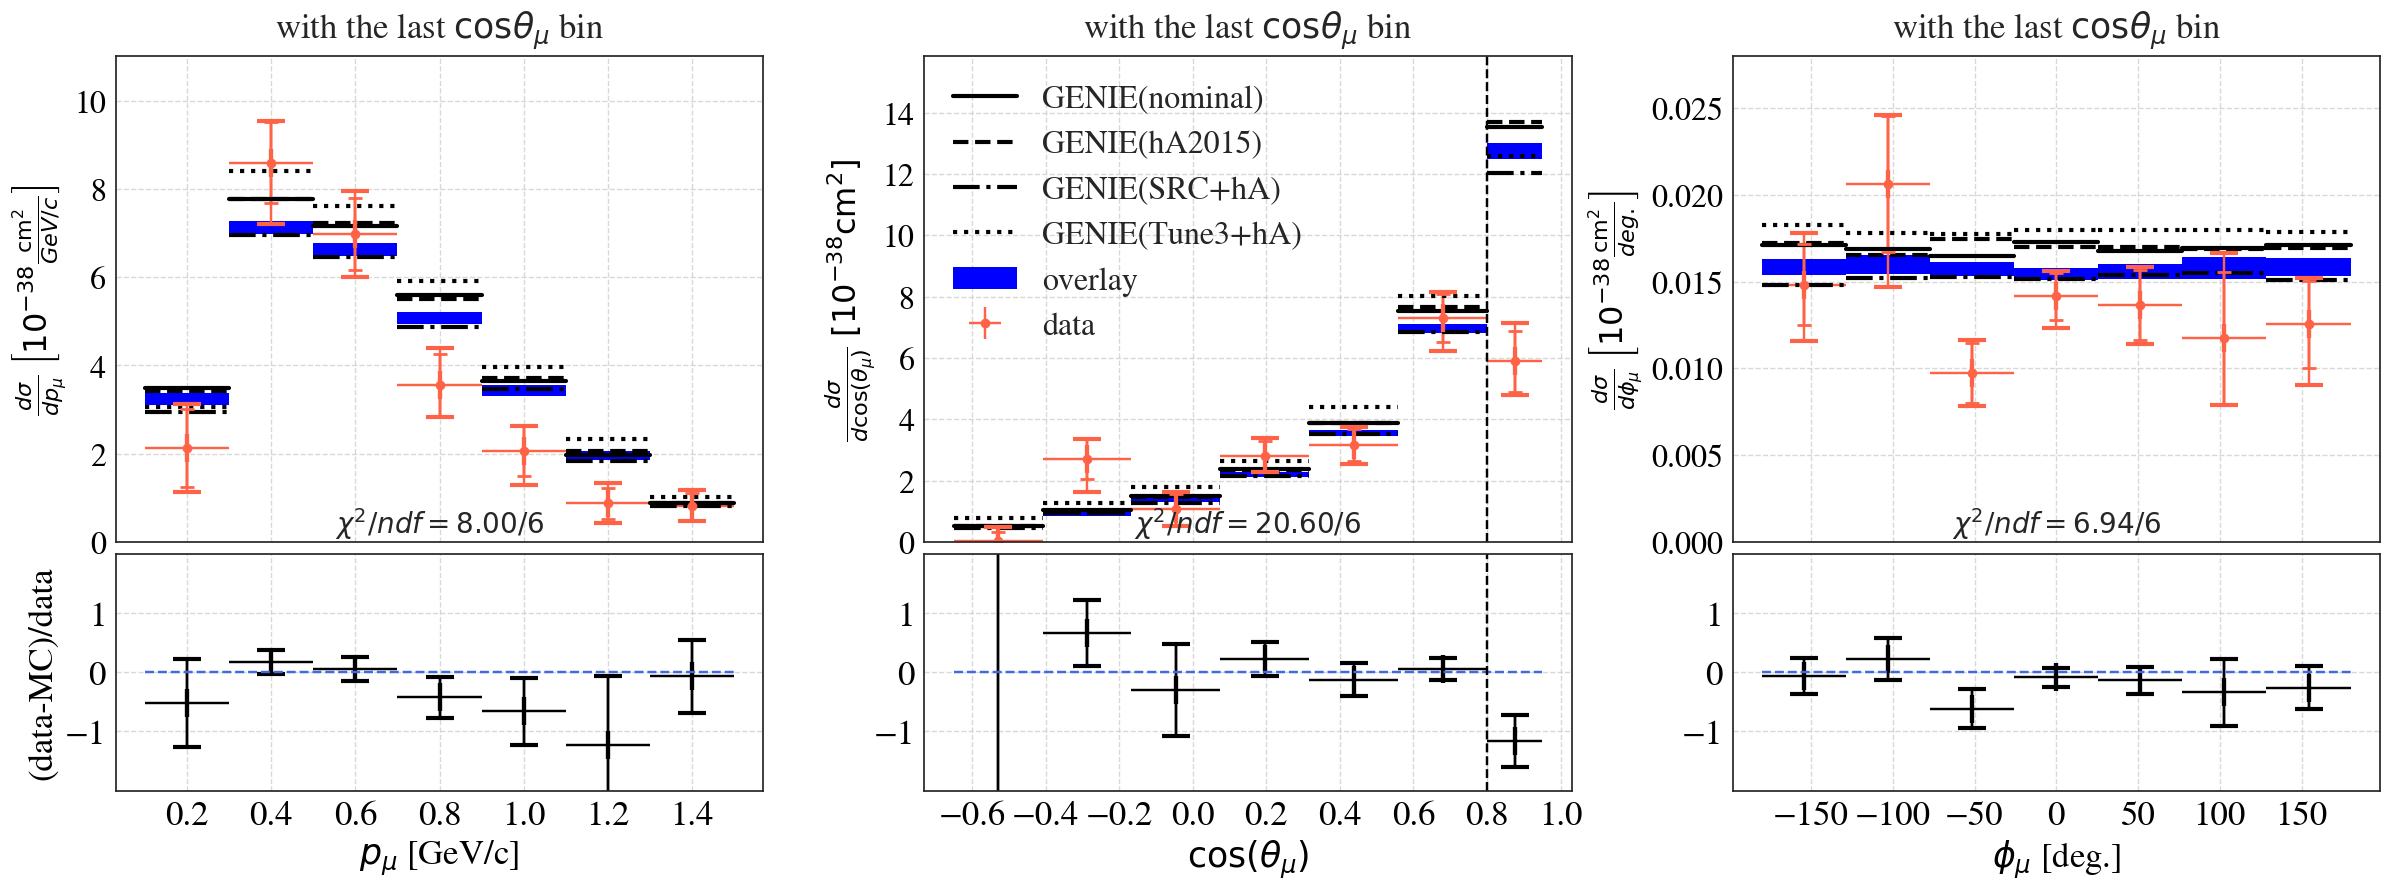

In [6]:
draw_Xsecs(do_add_afro_genie=True, debug=0, particle='mu', do_P=True, do_cos_theta=True, do_phi=True,figsize=(24,9),do_with_ctu_bin=True,
           residuals_ylim=[-2,2],residuals_yticks=[-1,0,1])

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pp_without_last_ctu_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pp_with_last_ctu_bin.pdf


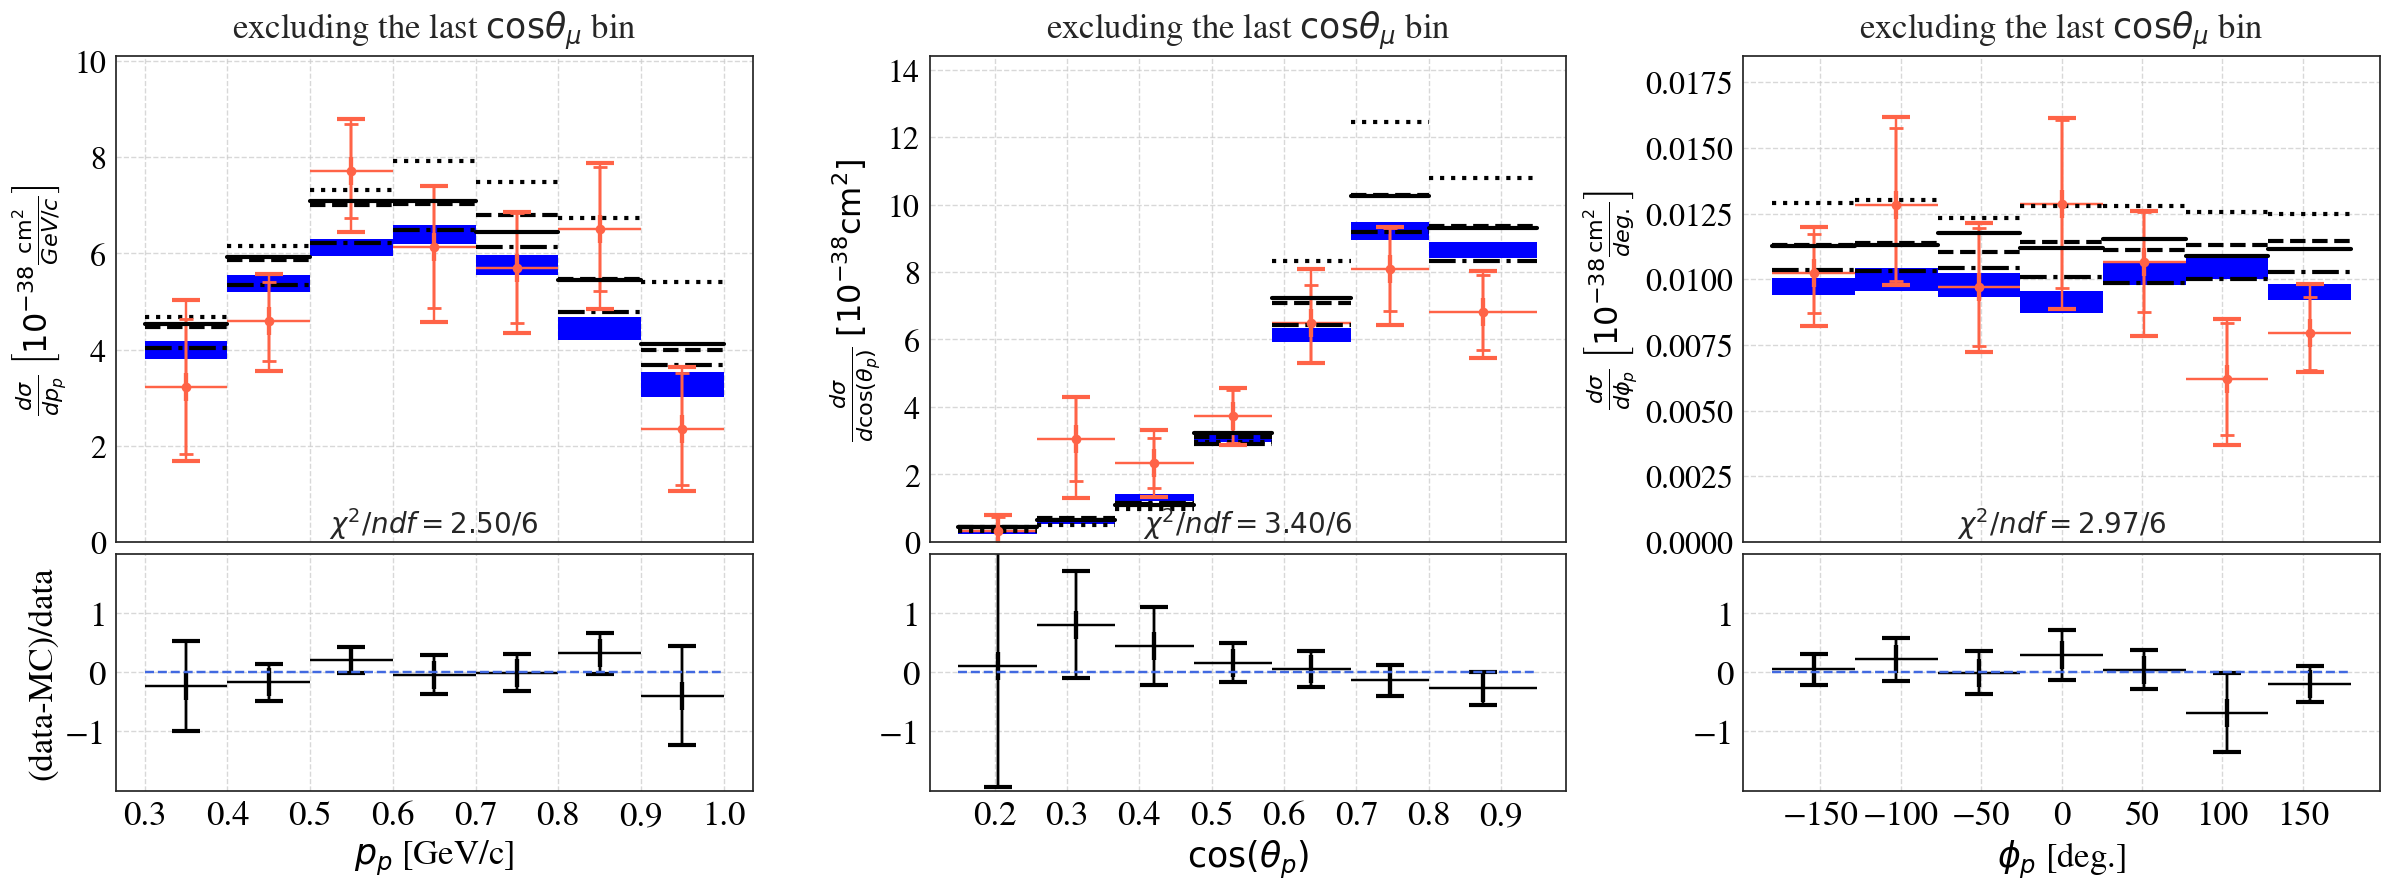

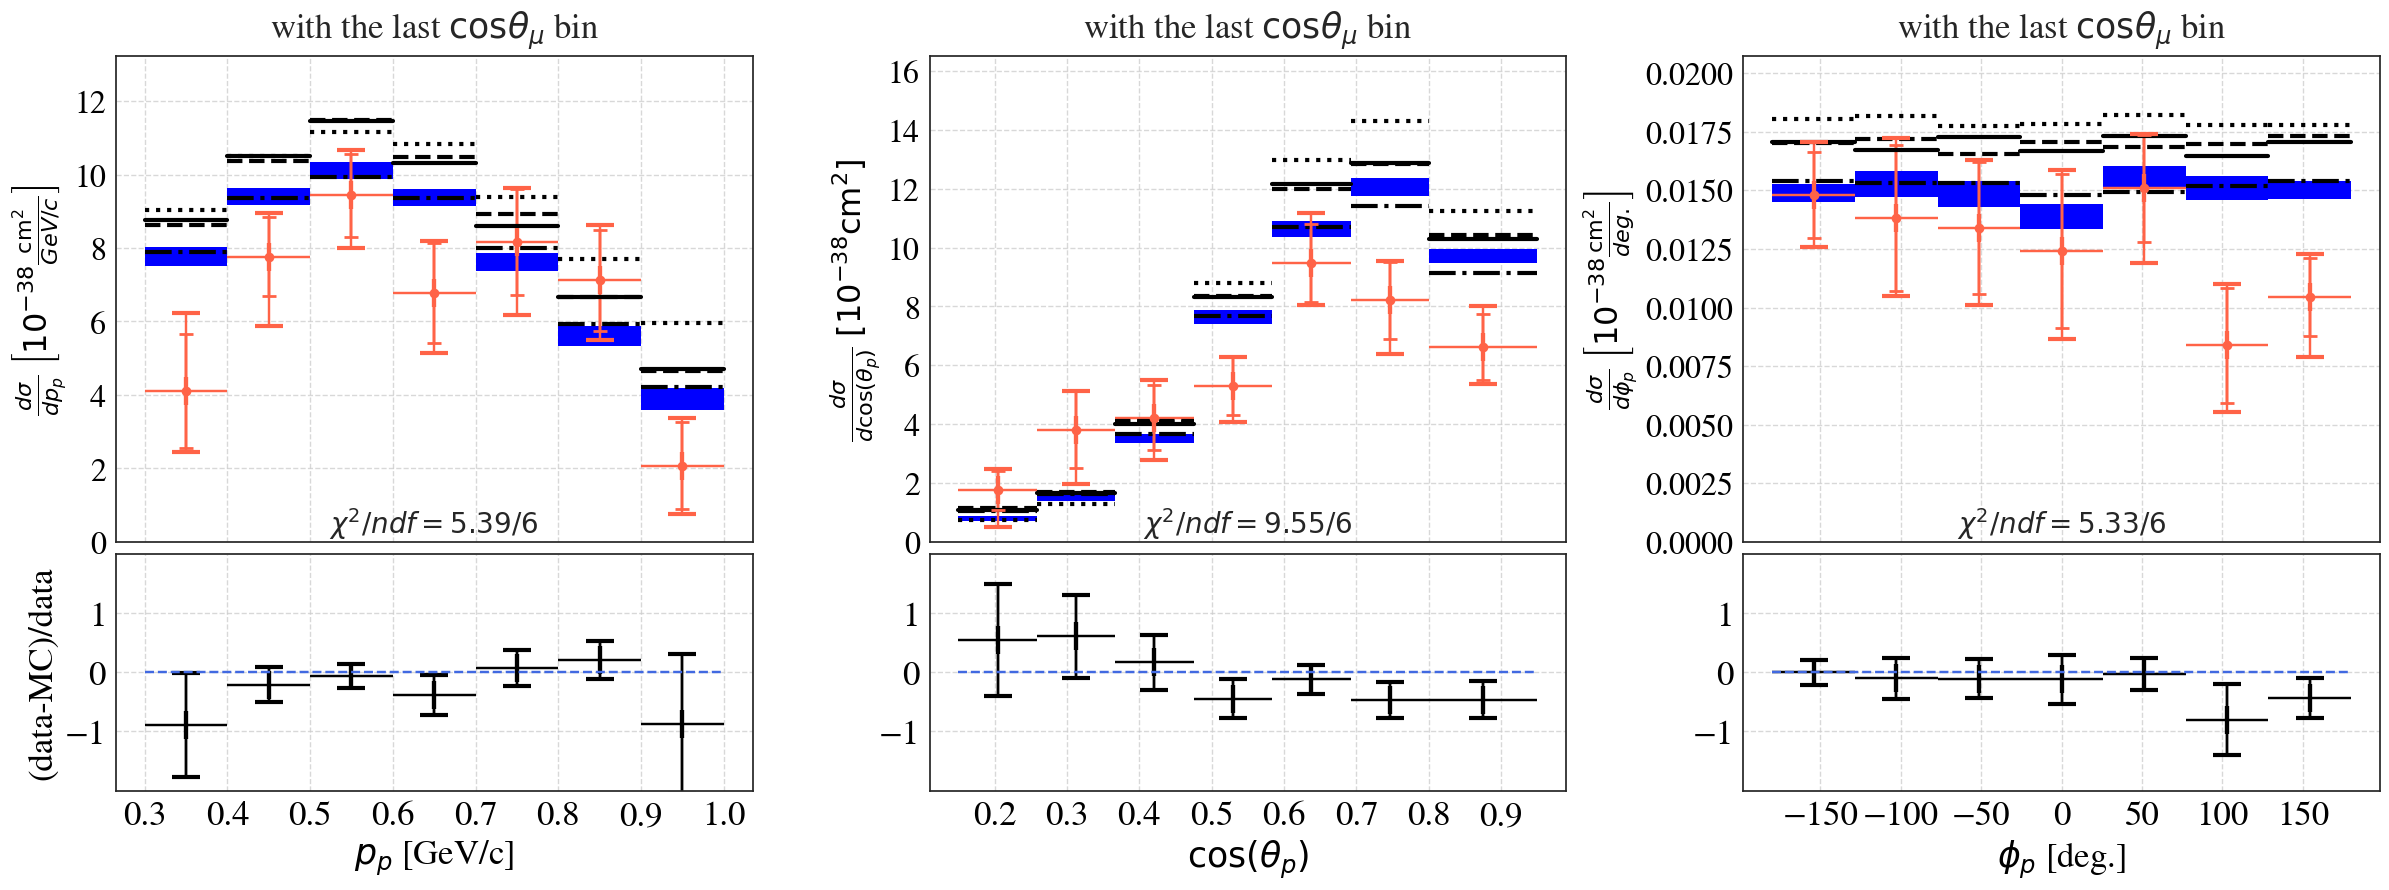

In [7]:
draw_Xsecs(do_add_afro_genie=True, debug=0, particle='p', do_P=True, do_cos_theta=True, do_phi=True,figsize=(24,9),do_with_ctu_bin=True,
           residuals_ylim=[-2,2],residuals_yticks=[-1,0,1])

In [41]:
Xsec_dicts_genie['mu'][Xsec_ctu_titles[0]]

{'hA2015 Pmu': array([ 3.313,  7.244,  5.666,  2.943,  0.956,  0.175,  0.02 ]),
 'hA2015 Pmu err': array([ 0.063,  0.092,  0.082,  0.059,  0.034,  0.014,  0.005]),
 'hA2015 Xsec': 4.0634757439239486,
 'hA2015 Xsec err': 0.030972909457031284,
 'hA2015 cos(theta(mu))': array([ 0.517,  0.948,  1.453,  2.348,  3.88 ,  7.67 ,  0.   ]),
 'hA2015 cos(theta(mu)) err': array([ 0.022,  0.03 ,  0.038,  0.048,  0.062,  0.087,  0.   ]),
 'hA2015 phi(mu)': array([ 0.011,  0.011,  0.012,  0.011,  0.011,  0.011,  0.011]),
 'hA2015 phi(mu) err': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 'hA_SRC Pmu': array([ 2.884,  6.535,  5.141,  2.645,  0.942,  0.174,  0.012]),
 'hA_SRC Pmu err': array([ 0.058,  0.088,  0.078,  0.056,  0.033,  0.014,  0.004]),
 'hA_SRC Xsec': 3.6663826576306602,
 'hA_SRC Xsec err': 0.029420636357303642,
 'hA_SRC cos(theta(mu))': array([ 0.445,  0.937,  1.28 ,  2.137,  3.522,  6.85 ,  0.   ]),
 'hA_SRC cos(theta(mu)) err': array([ 0.021,  0.03 ,  0.035,  0.046,  0.059,  0.082,  0.

## total cross-section

In [52]:
# muon dependent cross-section
def get_total_Xsec(do_add_afro_genie=True, debug=0, particle='mu',do_with_ctu_bin=False):
    
    Xsec_dicts = Xsec_results_dicts[particle]
    Xsec_dicts_genie_particle = Xsec_dicts_genie[particle]

    for iXsec,(Xsec_title,Xsec_fname,remove_ctu_bin) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames,remove_ctu_bools)):#{
        if remove_ctu_bin==False and do_with_ctu_bin==False: continue
            
        Xsec_dict = Xsec_dicts[Xsec_title]
        Xsec_genie_dict = Xsec_dicts_genie_particle[Xsec_title]
    
        Xsec = Xsec_dict['integrated Xsec']
        stat_err = Xsec_dict['integrated Xsec err']
        overlay_Xsec = Xsec_dict['mc Xsec']
        overlay_stat_err = Xsec_dict['mc Xsec err']

        
        observable='P'+particle
        var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
        h = dict()
        h['Xsec'],h['Xsec err'] = Xsec_dict[observable],Xsec_dict[observable+' err']
        h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+observable], Xsec_dict['mc '+observable+' err']
          
        # ---------------------------------------- # 
        # systematical uncertainties
        Xsec_sys_unc_cuts_up = Xsec_sys_unc_cuts[var + Xsec_fname + ' Xsec sys. err up']
        Xsec_sys_unc_cuts_dw = Xsec_sys_unc_cuts[var + Xsec_fname + ' Xsec sys. err dw']
        Xsec_sys_unc_flux_up = Xsec_sys_unc_beam_flux[var + Xsec_fname + ' Xsec sys. err up']
        Xsec_sys_unc_flux_dw = Xsec_sys_unc_beam_flux[var + Xsec_fname + ' Xsec sys. err dw']
        Xsec_sys_unc_POT_up = POT_unc * h['Xsec']
        Xsec_sys_unc_POT_dw = POT_unc * h['Xsec']
        h['Xsec sys err up'] = np.sqrt( np.square(Xsec_sys_unc_cuts_up) + np.square(Xsec_sys_unc_flux_up) + np.square(Xsec_sys_unc_POT_up) )
        h['Xsec sys err dw'] = np.sqrt( np.square(Xsec_sys_unc_cuts_dw) + np.square(Xsec_sys_unc_flux_dw) + np.square(Xsec_sys_unc_POT_dw) )
        h['Xsec tot err up'] = np.sqrt( np.square(h['Xsec sys err up']) + np.square(h['Xsec err']) )
        h['Xsec tot err dw'] = np.sqrt( np.square(h['Xsec sys err dw']) + np.square(h['Xsec err']) )
        
        sys_err_up = np.sum( h['Xsec sys err up']*bin_width )
        sys_err_dw = np.sum( h['Xsec sys err dw']*bin_width )
        tot_err_up = np.sum( h['Xsec tot err up']*bin_width )
        tot_err_dw = np.sum( h['Xsec tot err dw']*bin_width )
            
        
        print (r'\sigma_{CC1p\pi} = %.2f'%Xsec + r'\pm (%.2f'%stat_err + ')_{stat.} + (^{+%.2f} _{-%.2f}'%(sys_err_up,sys_err_dw)+')_{sys.} '
               + '=' 
               + '%.2f'%Xsec + ' + (^{+%.2f} _{-%.2f}'%(tot_err_up,tot_err_dw) + ') \\times 10^{-38} \\textrm{cm}^2')
        print (r'\sigma_{overlay} = %.2f'%overlay_Xsec + r'\pm (%.2f'%overlay_stat_err + ')_{stat.}'+'\\times 10^{-38} \\textrm{cm}^2')

        
        if do_add_afro_genie:#{
            for gname,glabel in zip(genie_list,genie_labels):#{
                print (r'\sigma_{\textrm{'+glabel+'}} = %.2f'%Xsec_dicts_genie['mu'][Xsec_ctu_titles[0]][gname+' Xsec'] 
                       + r'\pm %.2f'%Xsec_dicts_genie['mu'][Xsec_ctu_titles[0]][gname+' Xsec err'] +' \\times 10^{-38} \\textrm{cm}^2')
            #}
        #}


In [53]:
get_total_Xsec(do_add_afro_genie=True, debug=0, particle='mu',do_with_ctu_bin=False)

\sigma_{CC1p\pi} = 4.12\pm (0.74)_{stat.} + (^{+0.29} _{-0.52})_{sys.} =4.12 + (^{+0.80} _{-0.92}) \times 10^{-38} \textrm{cm}^2
\sigma_{overlay} = 3.75\pm (0.12)_{stat.}\times 10^{-38} \textrm{cm}^2
\sigma_{\textrm{GENIE(nominal)}} = 4.07\pm 0.03 \times 10^{-38} \textrm{cm}^2
\sigma_{\textrm{GENIE(hA2015)}} = 4.06\pm 0.03 \times 10^{-38} \textrm{cm}^2
\sigma_{\textrm{GENIE(SRC+hA)}} = 3.67\pm 0.03 \times 10^{-38} \textrm{cm}^2
\sigma_{\textrm{GENIE(Tune3+hA)}} = 4.57\pm 0.03 \times 10^{-38} \textrm{cm}^2
